In [180]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

# Function to calculate amino acid frequencies from a sequence
def calculate_aa_frequencies(sequence):
    analysis = ProteinAnalysis(sequence)
    aa_frequencies = analysis.count_amino_acids()
    total_aa = sum(aa_frequencies.values())
    aa_frequencies = {aa: freq / total_aa for aa, freq in aa_frequencies.items()}
    return aa_frequencies

# Apply the function to each sequence and create a DataFrame from the results
aa_frequency_data = df['Sequence'].apply(calculate_aa_frequencies)
aa_frequency_df = pd.DataFrame(aa_frequency_data.tolist(), index=df.index)

# Write amino acid frequencies to a text file
with open('amino_acid_frequencies.txt', 'w') as f:
    for index, row in aa_frequency_df.iterrows():
        f.write(f"Protein {index + 1}:\n")
        for amino_acid, frequency in row.items():
            f.write(f"{amino_acid}: {frequency:.4f}\n")
        f.write('\n')

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read your data into DataFrame (assuming you've added the amino acid frequencies as features)
df = pd.read_excel('phopt_sequences.xlsx')

# Step 5: Model Training
X = df.iloc[:, 4:]  # Features (amino acid frequencies), assuming they start from the fifth column
y = df.iloc[:, 2]   # Target variable (pH Optimum), assuming it's in the third column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 23.296692276502657


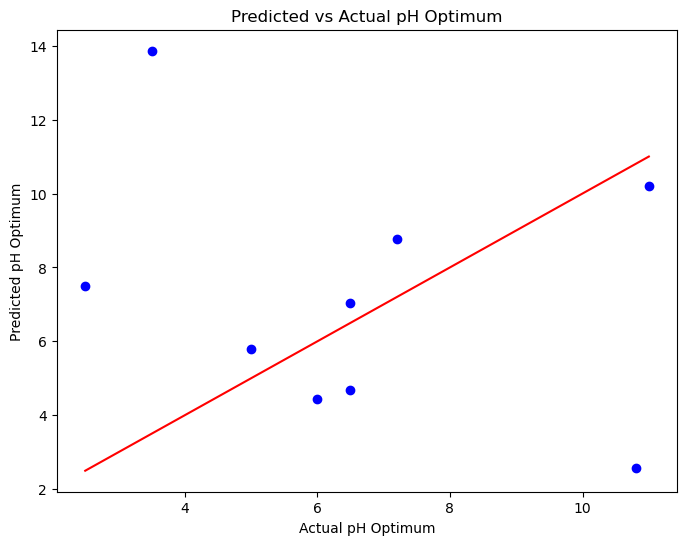

In [187]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual pH Optimum')
plt.ylabel('Predicted pH Optimum')
plt.title('Predicted vs Actual pH Optimum')
plt.show()

In [190]:
#FAST PETASE sequence 
protein_sequence = "MSHILRAAVLAAMLLPLPSMAQTNPYARGPNPTAASLEASAGPFTVRSFTVSRPSGYGAGTVYYPTNAGGTVGAIAIVPGYTARQSSIKWWGPRLASHGFVVITIDTNSTLDQPESRSSQQMAALRQVASLNGTSSSPIYGKVDTARMGVMGWSMGGGGSLISAANNPSLKAAAPQAPWHSSTNFSSVTVPTLIFACENDSIAPVNSSALPIYDSMSQNAKQFLEIKGGSHSCANSGNSNQALIGKKGVAWMKRFMDNDTRYSTFACENPNSTAVSDFRTANCSLE"

# Step 1: Feature Extraction
aa_frequencies = calculate_aa_frequencies(protein_sequence)
protein_features = pd.DataFrame([aa_frequencies])

# Step 2: Model Prediction
predicted_pH_optimum = model.predict(protein_features)

# Step 3: Interpretation
print("Predicted pH Optimum:", predicted_pH_optimum)

Predicted pH Optimum: [8.7600652]
